# Adiabatic cycle for infinite three-site chain

In [1]:
# ---------------------------------------------------
# Chain with three sites per cell - cyclic variation
# --------------------------------------------------

from __future__ import print_function # python3 style print
from pythtb import *

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
%matplotlib inline
rcParams.update({"text.usetex": True, "font.size": 16})

In [2]:
# define function to construct model
def set_model(t,delta,lmbd):
    lat=[[1.0]]
    orb=[[0.0],[1.0/3.0],[2.0/3.0]]
    model=tb_model(1,1,lat,orb)
    model.set_hop(t, 0, 1, [0])
    model.set_hop(t, 1, 2, [0])
    model.set_hop(t, 2, 0, [1])
    onsite_0=delta*(-1.0)*np.cos(lmbd)
    onsite_1=delta*(-1.0)*np.cos(lmbd-2.0*np.pi/3.0)
    onsite_2=delta*(-1.0)*np.cos(lmbd-4.0*np.pi/3.0)
    model.set_onsite([onsite_0,onsite_1,onsite_2])
    return(model)

def get_xbar(band,model):
    evec_array=wf_array(model,[21])        # set array dimension
    evec_array.solve_on_grid([0.])         # fill with eigensolutions
    wfc=evec_array.berry_phase([band])/(2.*np.pi)  # Wannier centers
    return(wfc)

In [3]:

# set fixed parameters
t=-1.3
delta=2.0

# obtain results for an array of lambda values
lmbd=np.linspace(0.,2.*np.pi,61)
xbar=np.zeros_like(lmbd)
for j,lam in enumerate(lmbd):
    my_model=set_model(t,delta,lam)
    xbar[j]=get_xbar(0,my_model)    # Wannier center of bottom band

# enforce smooth evolution of xbar
for j in range(1,61):
    delt=xbar[j]-xbar[j-1]
    delt=-0.5+(delt+0.5)%1.  # add integer to enforce |delt| < 0.5
    xbar[j]=xbar[j-1]+delt


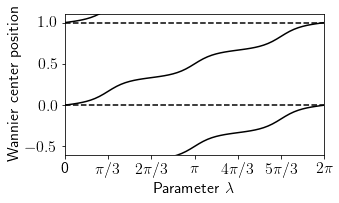

In [4]:
# set up the figure
fig, ax = plt.subplots(figsize=(5.,3.))
ax.set_xlim([0.,2.*np.pi])
ax.set_ylim([-0.6,1.1])
ax.set_xlabel(r"Parameter $\lambda$")
ax.set_ylabel(r"Wannier center position")
xlab=[r"0",r"$\pi/3$",r"$2\pi/3$",r"$\pi$",r"$4\pi/3$",r"$5\pi/3$",r"$2\pi$"]
ax.set_xticks(np.linspace(0.,2.*np.pi,num=7))
ax.set_xticklabels(xlab)
ax.plot(lmbd,xbar,'k')    # plot Wannier center and some periodic images
ax.plot(lmbd,xbar-1.,'k')
ax.plot(lmbd,xbar+1.,'k')
ax.axhline(y=1.,color='k',linestyle='dashed') # horizontal reference lines
ax.axhline(y=0.,color='k',linestyle='dashed')
fig.tight_layout()
#fig.savefig("chain_3_cycle.pdf")

plt.show()